# Research Notebook 1
## Zena Khadour 
## Date: Feb 13 - 17

# 1: Experience

For this week, I read a paper on the two body problem. I also attempted to solve two coupled differential equations relating the radius and the angle from the paper by a neutral network that was coded using the python package Deepxde.

## Motivation:

This exercise was important to practise using neural networks and the Deepxde package to solve a relatively simple and well-known problem in physics. This activity helped me apply the knowledge I acquired in the past two weeks, which occured through preparing my journal club presentation on the two-body problem and the taking a google crash course on neural networks and machine learning. 

# 2: What? (What happened?)
## Describe what happened during your activities for the week.

The main focus for this week was to train the neural netwerk to solve euqation (34) from the two-body problem paper. 

\begin{equation} 
E = \frac{1}{2} m_{*} \frac{d^{2}r}{dt^{2}} + U_{eff} ; \frac{d \theta}{dt} = \frac{l}{m_{*} r^{2}}  
\end{equation}

As an important reality check, I started off by solving the system of differential equations above using python's package solve.ivp, as follows: 

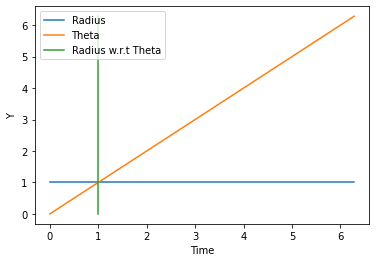

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import tensorflow as tf 


l = 1 
m = 1 #Reduced mass of the system 

def ode_system(t, y):
    y1, y2, y3 = y 
    dy1_dt = y2
    dy2_dt = y2**(-3) - y2**(-2)
    dy3_dt = l * (m * y2**2)**(-1)
    return [dy1_dt,dy2_dt,dy3_dt]

y0 = [1, 1, 0]

sol = solve_ivp(ode_system, [0, np.pi*2], y0)

plt.plot(sol.t, sol.y[1], label= "Radius")
plt.plot(sol.t, sol.y[2], label= "Theta")
plt.plot(sol.y[1], sol.y[2], label= "Radius w.r.t Theta")
plt.xlabel('Time')
plt.ylabel('Y')
plt.legend(loc="upper left")
plt.show()

The resulting plot shows that the radius is constant with time but the angle increases as time progresses. 

The next step was to solve the same systems of equations using a neural network.

The following code represents my attempt at usnig the neural network to solve the effective one-body problem. The code doesn't work perfectly quite yet as I'm still facing dimensinality problems.

In [ ]:
! pip install deepxde
import deepxde as dde

def ode_system(x, y):
    """ODE system.
    
    """
    # Most backends
    y1, y2, y3 = y[:, 0:1], y[:, 1:2], y[:, 2:]
    dy1_x = dde.grad.jacobian(y, x, i=0)
    dy2_x = dde.grad.jacobian(y, x, i=1)
    dy3_x = dde.grad.jacobian(y, x, i=2)
    return [dy1_x - y2, dy2_x* y2**3 - 1 + y2, dy3_x - (l * (m * y2**2)**(-1))]

def boundary(_, on_initial):
    return on_initial

def func(x):
    """
    y1 = sin(x)
    y2 = cos(x)
    """
    return np.hstack((np.sin(x), np.cos(x)))

geom = dde.geometry.TimeDomain(0, 10)
ic1 = dde.icbc.IC(geom, lambda x: 0, boundary, component=0)
ic2 = dde.icbc.IC(geom, lambda x: 1, boundary, component=1)
ic3 = dde.icbc.IC(geom, lambda x: 2, boundary, component=2)
data = dde.data.PDE(geom, ode_system, [ic1, ic2], 35, 3, solution=func, num_test=1000)

layer_size = [1] + [50] * 3 + [3]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)
model.compile("adam", lr=0.001) # metrics=["l2 relative error"])

losshistory, train_state = model.train(iterations=20000)

#dde.saveplot(losshistory, train_state, issave=True, isplot=True)

There are two approaches I can follow to fix the above: \\

1. One suggestions is to apply nondimensionalization on the above system of equations and reattempt to solve the differential equations using the neural network. \\

2. Another approach would be to fix the dimensionality errors in the current syntax by tracking the mistake to its origin using problem solving. I think this error has arised after I rewrote my system of differnetial equations as three coupled equations instead of two. I have added an extra initial condition as a result, but it seems like I have to increase the boundary points that need to be sampled. 

# 3: So what? (What does it mean?)
## Describe your results

Some important take-aways from the paper included: 
1. We are able to reduce a two-body problem in three-dimensional space into a one-body problem in one dimension using conservation of linear and angular momentum, as well as conservation of energy. 
2. The presence of a minimum in the effective potential leads to radial oscillations 
3. A circular orbit occurs if the particle sits at the bottom of the potential well. 
4. If there are no minima or the particle has sufficient kinetic energy then its motion will not be bound and it can escape to infinity.

![picture](https://drive.google.com/file/d/1-NbKXJ9VgFLxcSBLjk8tBzsZ8idYj6Wm/view?usp=share_link)

image credits: ref[1]
5. The Kepler problem is a two-body problem with central potential given by two special cases: 
 
- $U(r) = \frac{- \gamma}{r}$; $\gamma > 0$
- $U(r)$ = $\gamma r^{2}$; $\gamma > 0$



It was important to go through this exercise to develop a better understading of the operations carried by the neural network to arrive at the desired solution. \\
The results I obtained can be used to compare/check the solutions obtained when using post-newtonian expansion, such that PN = 1. 

# 4. Now what? (What's next?)
## Plan for the next week

The plan for next week is to adopt one of the approaches mentioned above to fix the dimensionality problem in my code.

Secondly, vary the parameters of the neural networks and notice the effect it will have on solution by comparig it to the classical solution. 

Additionally, I'm going to apply the Yukawa potential equations to the neural network and attempt to get the same solution obtained in the paper. 





# 5. Bibliography

[1]https://web.physics.ucsb.edu/~fratus/phys103/LN/TBP.pdf

[2] Lu, L., Meng, X., Mao, Z., & Karniadakis, G. E. (2021). DeepXDE: A deep learning library for solving differential equations . DeepXDE. Retrieved 2022, from https://deepxde.readthedocs.io/en/latest/ 